#Origins of wine
###Mwenya Sikazwe

<h2><center>Introduction</center></h2>


The data given is the outcome of a chemical examination of different cultivars of Italian wines produced in the same Italian region. Using 178 different samples and a comprehensive chemical analysis of these samples, we are trying to identify certain patterns and attributes from which certain wines are produced from so that we can determine where a wine could originate from based on its chemical attributes with a model.

Based on the data given, a possible solution could involve building a predictive model that can identify the chemical attributes of the wine and determine its origin.


<h2><center>Data Description & Exploratory Analysis</center></h>

Each wine sample is taken from one of 3 cultivars and contains 13 attributes; Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, the protein concentration diluted wines and Proline.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import the data

In [ ]:
from numpy.core.numeric import array_equal
df = pd.read_csv('wine.csv', header=None)
ff = df.iloc[:, :-1]
lf = df.iloc[:,-1:]
df.columns = ['Target','Alcohol','Malic acid','Ash','Alcanicity of ash','Magnesium','Total phelons','Flavanoids','Nonflavanoid phenols','proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','proline']

df.head()


,Target,Alcohol,Malic acid,Ash,Alcanicity of ash,Magnesium,Total phelons,Flavanoids,Nonflavanoid phenols,proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


quick summary of the data

In [ ]:
df.describe()


,Target,Alcohol,Malic acid,Ash,Alcanicity of ash,Magnesium,Total phelons,Flavanoids,Nonflavanoid phenols,proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


overview of all the data (histogram)

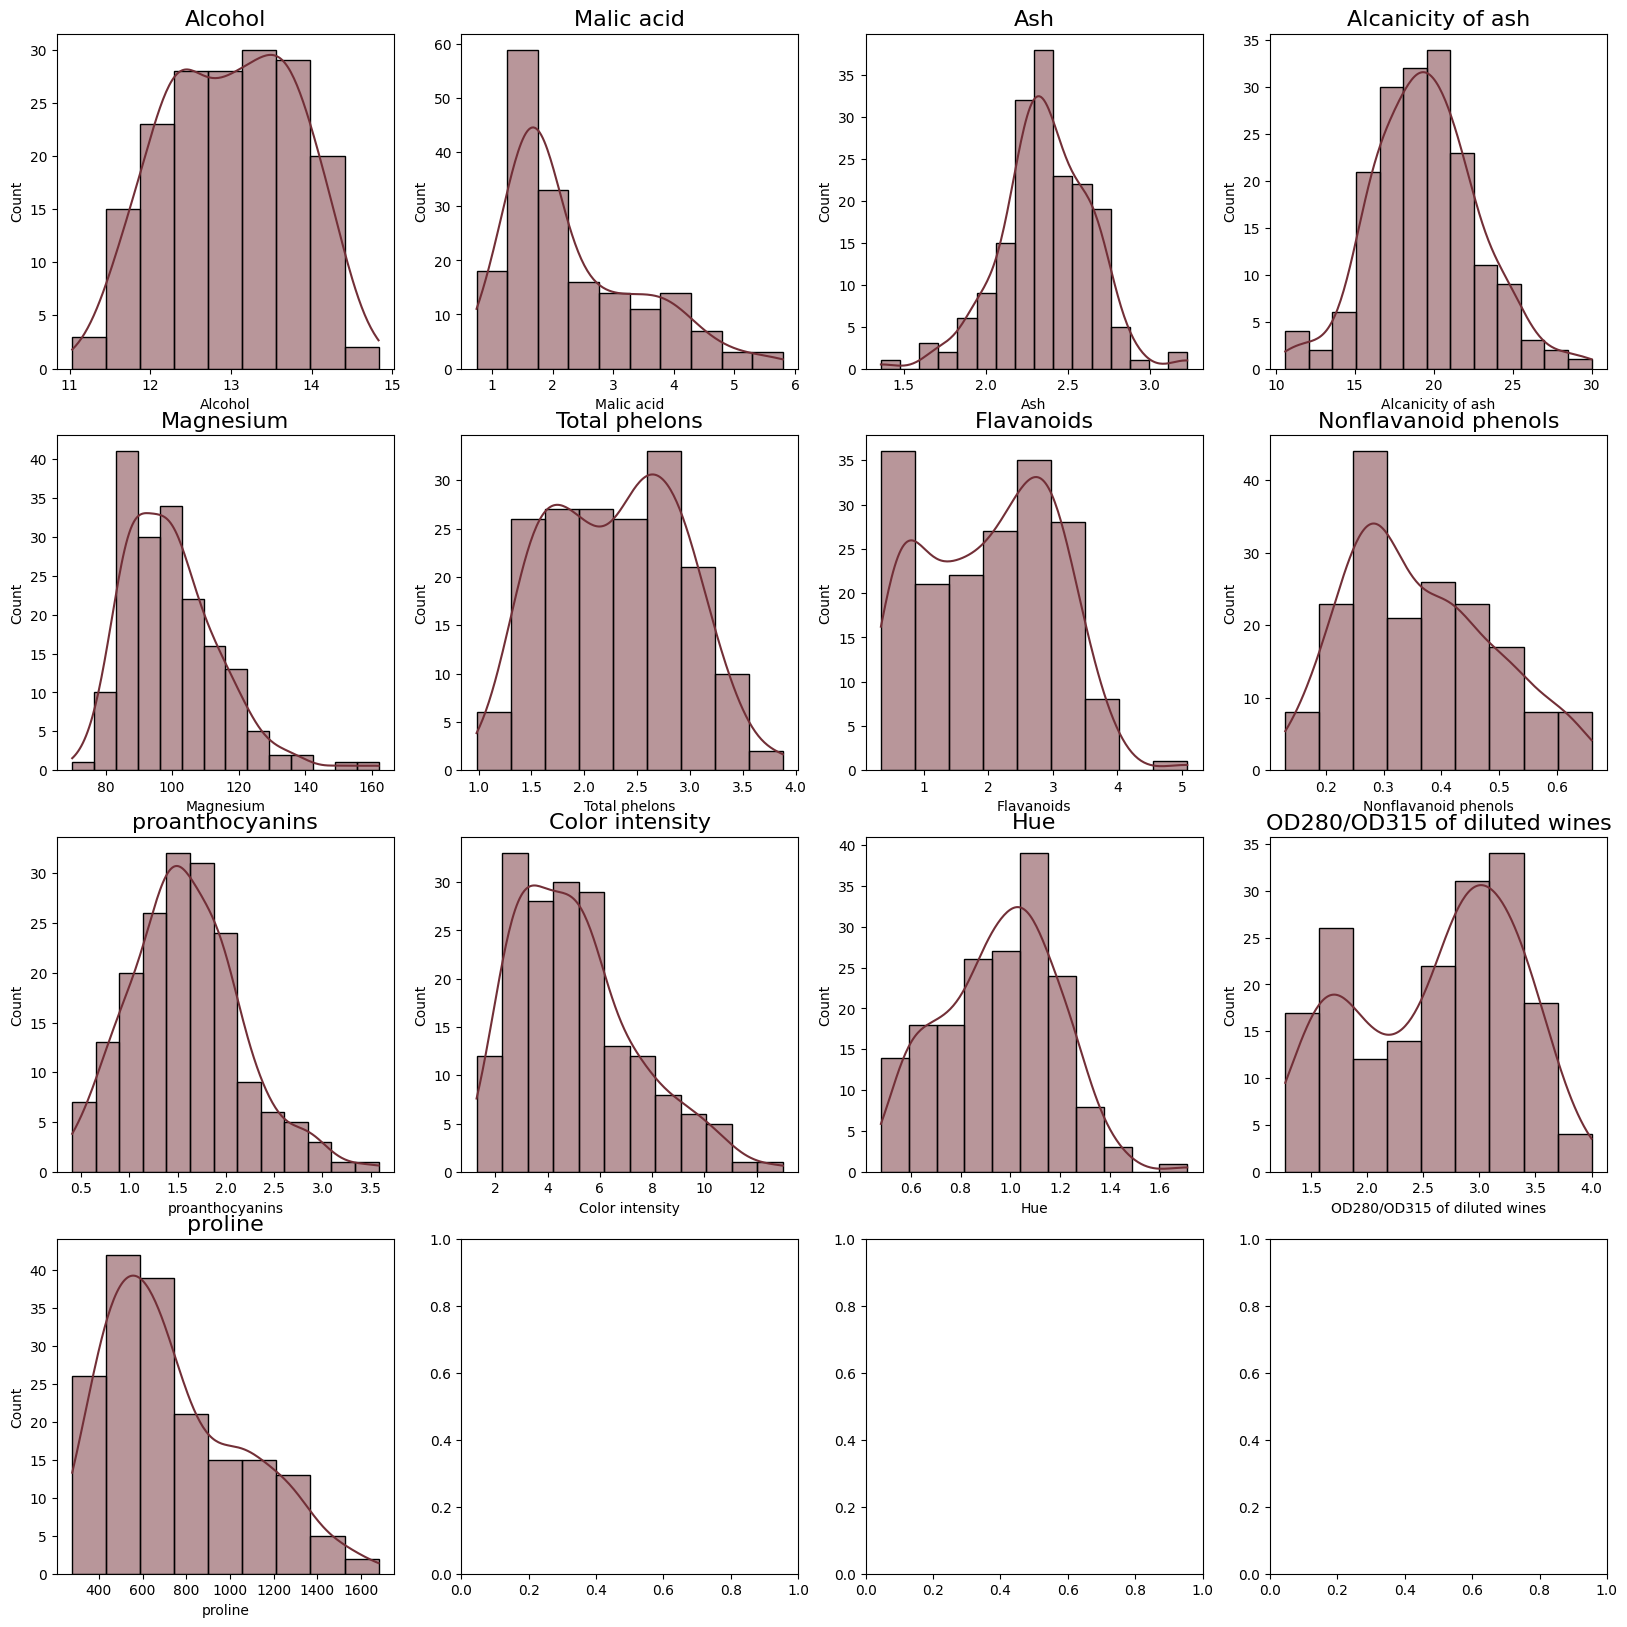

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
for i, feature in enumerate(df.columns[1:]):#[1:] to get rid of the target
    row, col = i // 4, i % 4
    sns.histplot(df[feature], ax=ax[row, col], kde=True, color='#722F37')
    ax[row, col].set_title(feature, fontsize=16)
plt.tight_layout()
plt.show()

we use histogram to overview the entire dataset



box plot in comparison

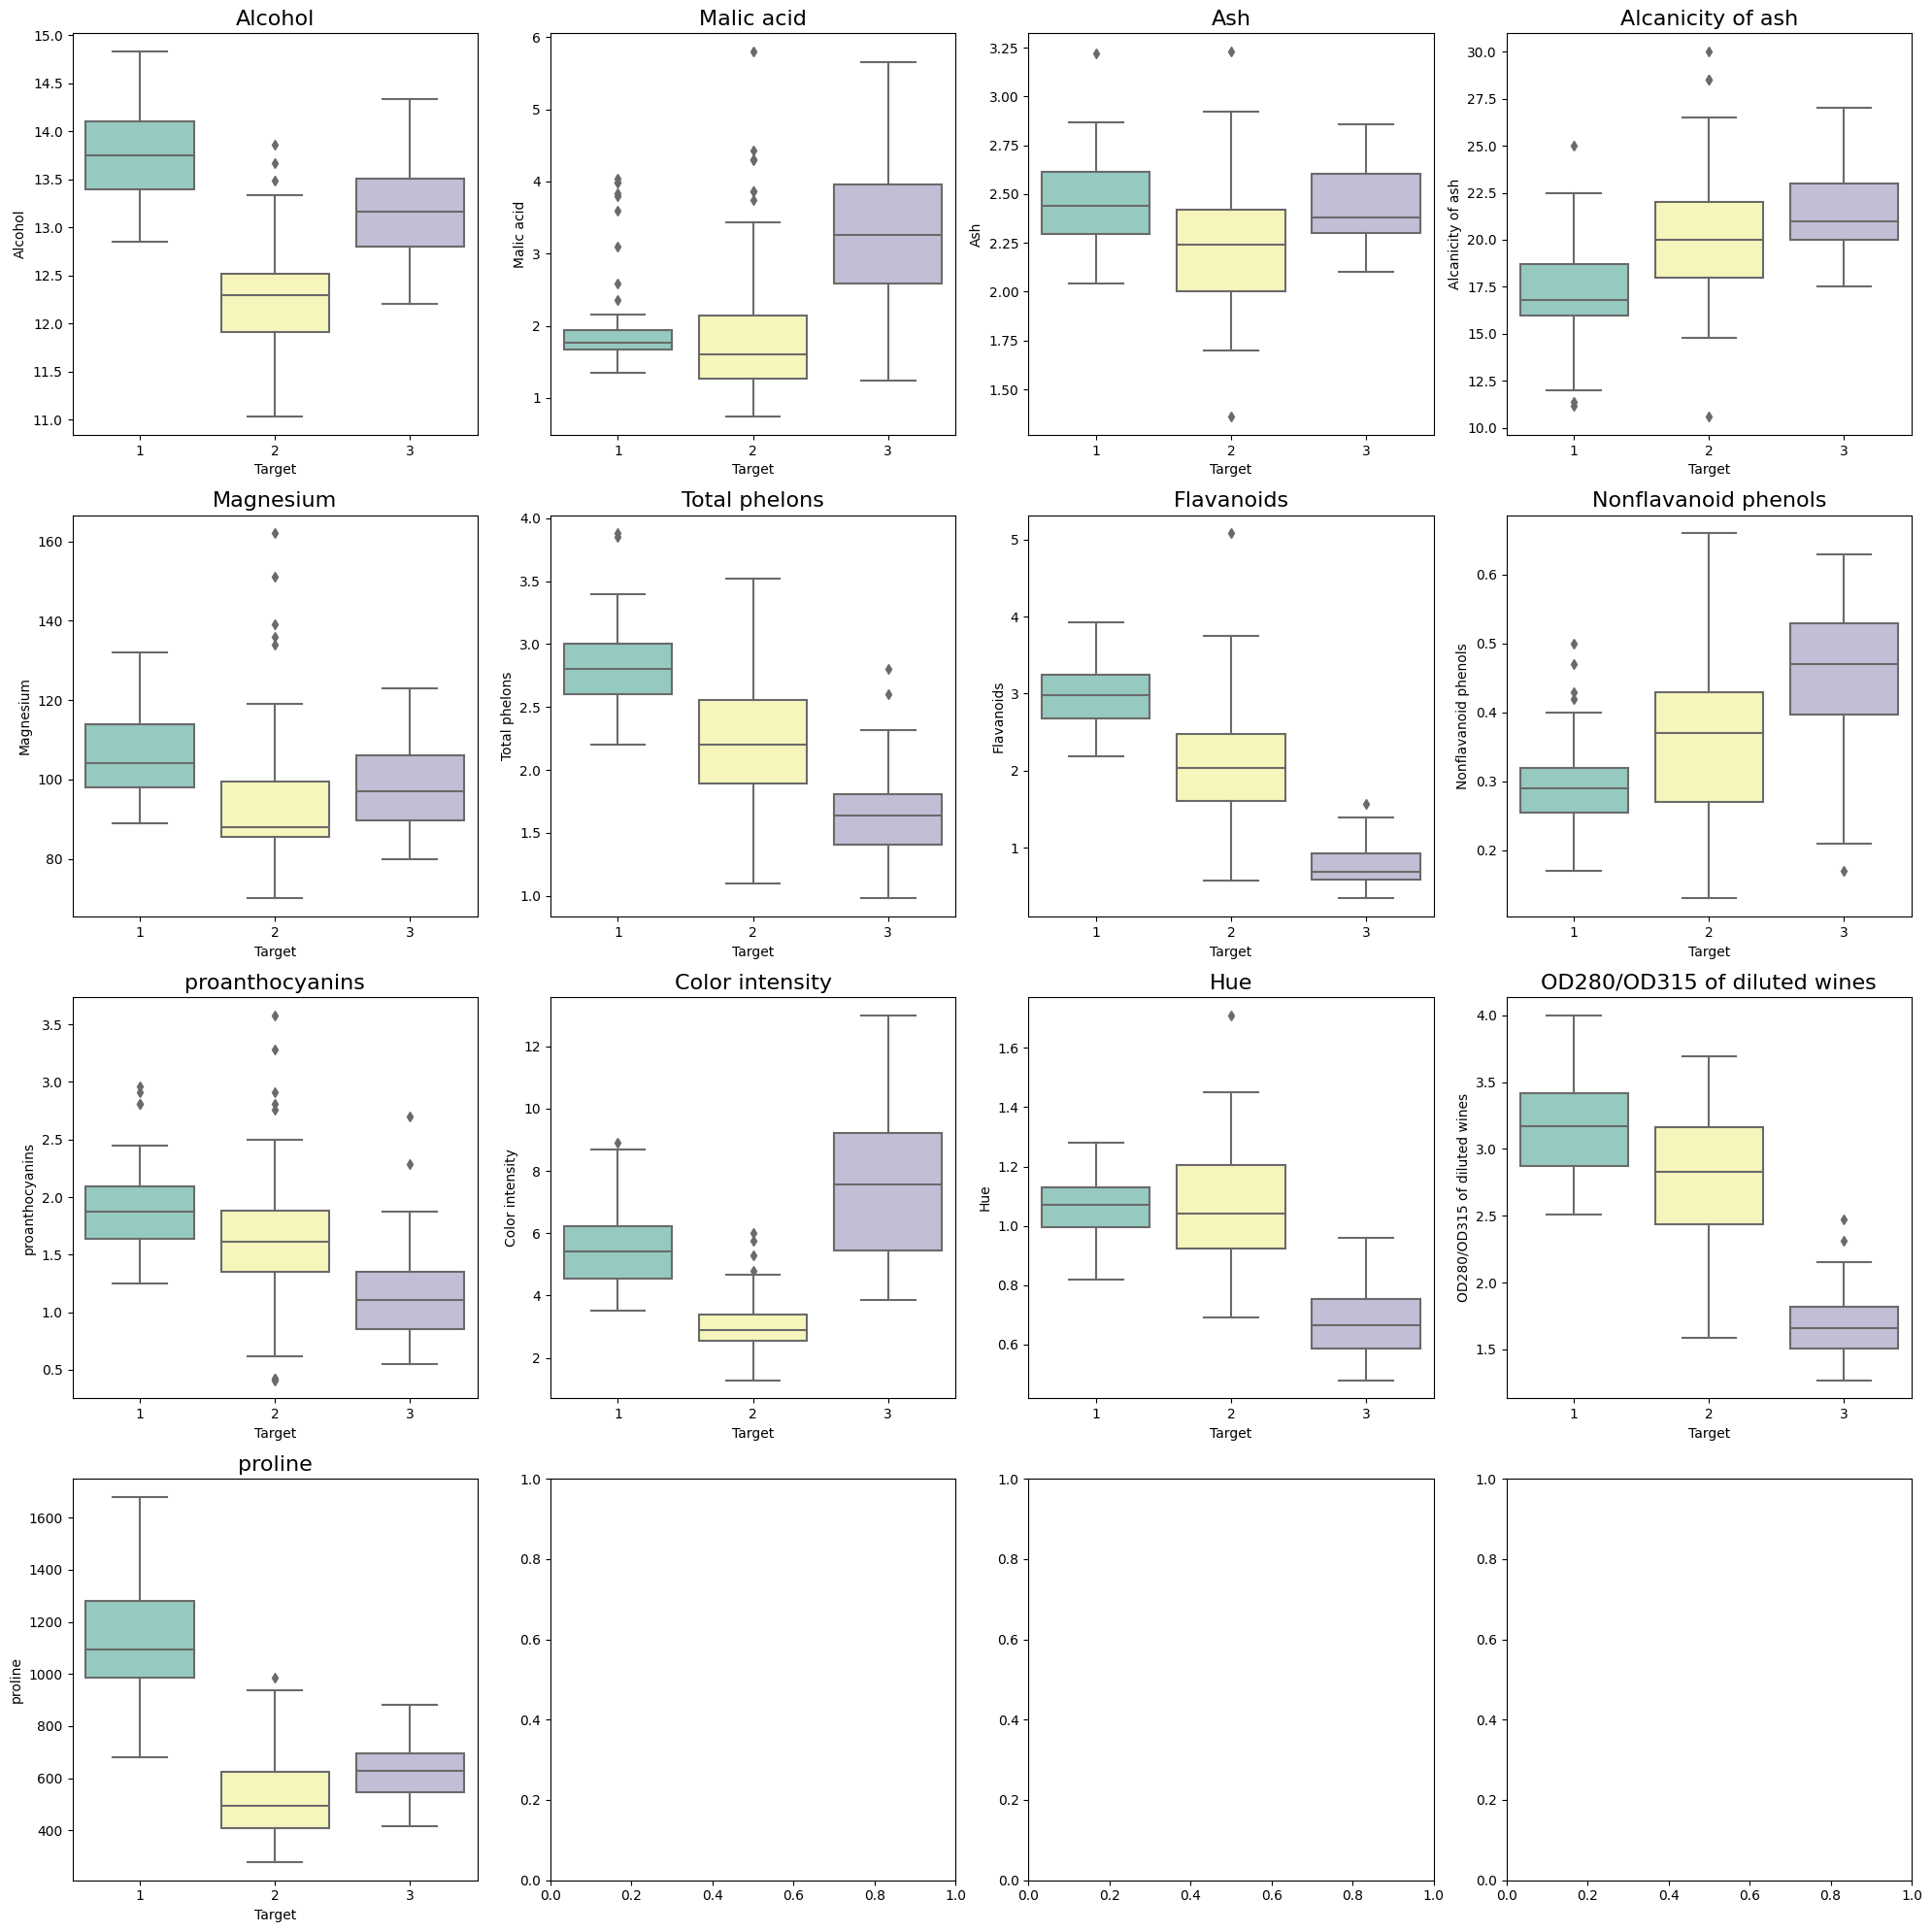

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
for i, feature in enumerate(df.columns[1:]):
    row, col = i // 4, i % 4
    sns.boxplot(x='Target', y=feature, data=df, ax=ax[row, col], palette='Set3')
    ax[row, col].set_title(feature, fontsize=16)
plt.tight_layout()
plt.show()

The data shows general differences in certain attributes (e.g-flavanoids) but also shows great similarities in attributes such as Ash and its alcanicity.

<h2><center>Model & Results</center></h>

We are going to solve this problem using a clustering model

calculate correlation coeficients between the feature and label (above 0.5)

In [ ]:
corr = ff.apply(lambda ff: ff.corr(lf.iloc[:,0]))

selected_features = ff.columns[corr.abs() > 0.5]
ff_selected = ff[selected_features]
ff_selected


,0,1
0,1,14.23
1,1,13.20
2,1,13.16
3,1,14.37
4,1,13.24
...,...,...
173,3,13.71
174,3,13.40
175,3,13.27
176,3,13.17


arrange the correlation coeficnets into the 3 targets

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10).fit(ff_selected)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

now let's visualise the data

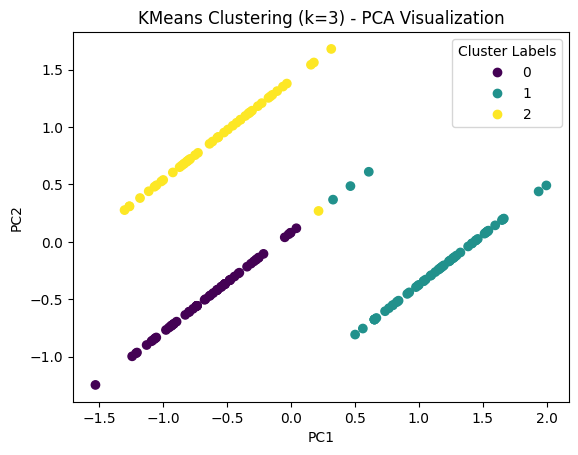

In [ ]:
pca = PCA(n_components=2)
ff_pca = pca.fit_transform(ff_selected)

scatter = plt.scatter(ff_pca[:, 0], ff_pca[:, 1], c=kmeans.labels_)
plt.xlabel('PC1')#the first most variance in the data
plt.ylabel('PC2')#the second most variance in the data
plt.title('KMeans Clustering (k=3) - PCA Visualization')

handles, labels = scatter.legend_elements()
plt.legend(handles, labels, loc='upper right', title='Targets')

plt.show()

the data model is complete and it's accuracy can now be tested via

In [ ]:
##Convert the true labels to a 1D numpy array

#y_true = y.values.ravel()

## Calculate the accuracy of the clustering

#acc = accuracy_score(y_true, kmeans.labels_)
#format(acc * 100)

<h2><center>Conclusion</center></h>

In conclusion, the data analysis and modeling process showed promising results in predicting the origin of wines based on their chemical attributes. However, the limitations of the dataset, such as the generalization of certain attributes, may reduce the accuracy of the model. Despite this, the model still showed strong performance in identifying attributes with large variations between the different wine cultivars, such as total phenols and color intensity.

Future research could involve expanding the dataset to include more diverse samples and further exploring the correlation between chemical attributes and the origin of wines. Additionally, other modeling techniques, such as neural networks or decision trees, could be employed to further enhance the accuracy of the prediction.

Overall, this study provides valuable insights into the complex relationship between chemical attributes and the origin of wines and could have practical applications in the wine industry.

<h2><center>References</center></h>

[1] - Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.